ECO 6193/6593. Tutorial Python - Google Collab Notebook.

First step: package importation.

In [1]:
# import packages
import numpy as np
# import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

Define DMP model parameters.

In [2]:
# Model parameters
r = (1 + 0.04)**(1/12) - 1      # interest/discount rate (monthly)
delta = 0.02                    # separation rate (monthly)
A = 0.25                        # matching efficiency
eta = 0.5                       # elasticity of matching wrt unemployment
z = 1.0                         # match productivity
b = 0.4                         # unemployment benefits
c = 0.8                         # vacancy posting cost
gamma = 0.5                     # worker's relative bargaining power
n = 0.0                         # population growth rate

%whos


Variable   Type      Data/Info
------------------------------
A          float     0.25
b          float     0.4
c          float     0.8
delta      float     0.02
eta        float     0.5
gamma      float     0.5
n          float     0.0
np         module    <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
pd         module    <module 'pandas' from 'c:<...>es\\pandas\\__init__.py'>
plt        module    <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
r          float     0.0032737397821989145
z          float     1.0


Variable types in Python.

In [3]:
# Some Data types

# float
print(type(r))

# integer
print(type(1))

# string
print(type('allo'))

# boolean
print(type(True))

# list
xx = ['allo', 2]
xx[0] = 'hello'
print(type(xx))
print(xx)

# dictionary
zz = {'string' : 'allo', 'number' : 2, b : 2}
zz['string'] = 'hello'
zz[b] = 0
print(type(zz))
print(zz)

# tuple
yy = ('allo', 2)
print(type(yy))
# yy[0] = 'hello' # not supported!



<class 'float'>
<class 'int'>
<class 'str'>
<class 'bool'>
<class 'list'>
['hello', 2]
<class 'dict'>
{'string': 'hello', 'number': 2, 0.4: 0}
<class 'tuple'>


Arrays

In [4]:
# arrays
x = np.array([1.0, 2, 3])
y = np.array([1, 1, 1])
print(type(x))
print( np.matmul(x,y) )


<class 'numpy.ndarray'>
6.0


Dictionary

In [5]:
# Build a dictionary with parameters values and param. description/interpretation
params = {'r': [r, 'discount rate'],
    'delta': [delta, 'separation rate'],
    'A': [A, 'matching efficiency'],
    'eta': [eta, 'elasticity of matching wrt unemployment'],
    'z': [z, 'match productivity'],
    'b': [b, 'unemployment benefits'],
    'c': [c, 'vacancy posting cost']}

# Add remaining parameters to the dictionary
params['gamma'] = [gamma, 'worker bargaining power']
params['n'] = [n, 'population growth rate']

Data

In [6]:
# Convert dictionary to a dataframe and print table
param_table = pd.DataFrame.from_dict(params, orient = 'index', columns=['Value', 'Description'])
param_table


,Value,Description
r,0.003274,discount rate
delta,0.020000,separation rate
A,0.250000,matching efficiency
eta,0.500000,elasticity of matching wrt unemployment
z,1.000000,match productivity
b,0.400000,unemployment benefits
c,0.800000,vacancy posting cost
gamma,0.500000,worker bargaining power
n,0.000000,population growth rate


Functions and graphs

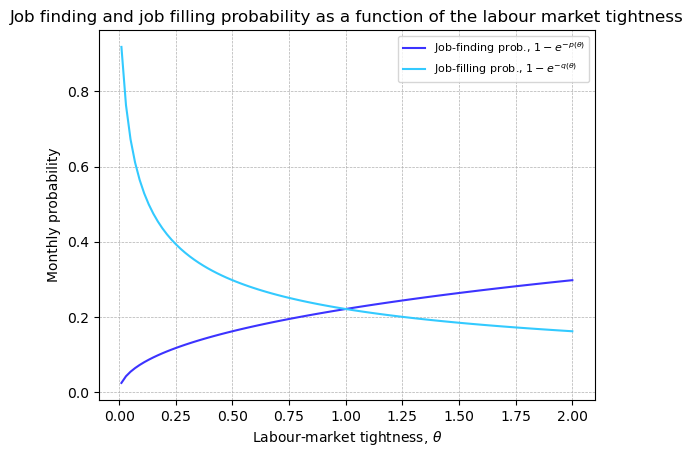

In [7]:
# Define the matching function (Cobb-Douglas)
# and plot probability of finding a job and probability of filling a vacancy

def m(u, v):
    return A * u**eta * v**(1-eta)

# probability of finding a job
def p(theta):
    return m(1, theta)

# probability of filling a vacancy
def q(theta):
    return m(1/theta, 1)

# plot job finding probability and job filling probability as a function of theta with the legend

# compute variables
theta = np.linspace(0.01, 2.0, 100) # define a vector of 100 uniformly spaced theta values from 0.01 to 2.5
ptheta = 1 - np.exp(-p(theta))      # compute the monthly probability of finding a job
qtheta = 1 - np.exp(-q(theta))      # compute the monthly probability of filling a vacancy

# plot
plt.plot(theta, ptheta, label='Job-finding prob., $1 - e^{-p(\\theta)}$', color='#3C33FF'  )
plt.plot(theta, qtheta, label='Job-filling prob., $1 - e^{-q(\\theta)}$', color='#33CAFF'  )

# legend
plt.legend(fontsize=8, loc='upper right')

# title and axis labels
plt.title('Job finding and job filling probability as a function of the labour market tightness', fontsize=12)
plt.xlabel('Labour-market tightness, $\\theta$', fontsize=10)
plt.ylabel('Monthly probability', fontsize=10)

# grid
plt.grid(linestyle='--', linewidth=0.5)

# hex color code: https://en.wikipedia.org/wiki/Web_colors


Root finding

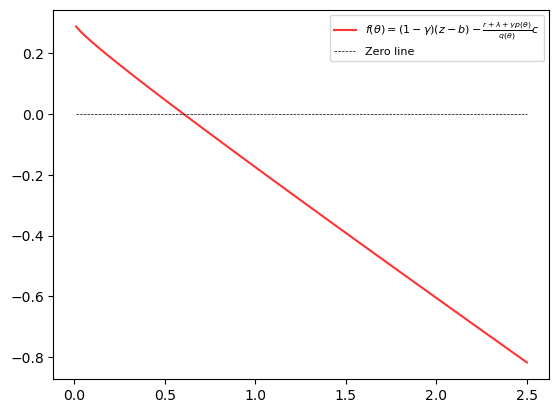

In [8]:
# Find the root of a function
# Example 1: job creation condition: find theta consistent with preset parameters

# Define function for job creation condition
def f(theta):
    return (1-gamma)*(z - b) - (r + delta + gamma*p(theta))/q(theta) * c

# plot the function f(theta)
theta = np.linspace(0.01, 2.5, 100)
plt.plot(theta, f(theta), label='$f(\\theta) = (1-\\gamma) (z-b) - \\frac{r+\\lambda+\\gamma p(\\theta)}{q(\\theta)} c$', color='#FF3333'  )

# plot a horizontal line at zero
plt.hlines(0, theta[0], theta[-1], color='black', linestyle='--', linewidth=0.5, label='Zero line')

# add a legend
plt.legend(fontsize=8, loc='upper right')


Root finding (cont')

In [9]:
# solve for theta (given parameters) numerically

# import fsolve function
from scipy.optimize import fsolve

# find f(theta) = 0
theta0 = 0.5 # initial guess
print('Initial guess f value, f(theta0) = ')
print(f(theta0))

# call fsolve to find root
theta_star = fsolve(f, theta0)

# print output
print('Root, theta* = ')
print(theta_star)

print('f value at root, f(theta*) = ')
print(f(theta_star))


Initial guess f value, f(theta0) = 
0.047337538484595265
Root, theta* = 
[0.60515918]
f value at root, f(theta*) = 
[5.55111512e-17]


Data importations and preparation

In [10]:
# Working with dataframes

# import U.S. unemployment and vacancy data from FRED

# method 1: import from local files

# cd to data directory
import os
data_dir = 'D:\Dropbox\Teaching - supervision\ECO6193-6593 - Labour\Python'
os.chdir(data_dir)

# Job Openings: Total Private (FRED from BLS series number JTS1000JOL; units: thousands)
vac = pd.read_csv('JTS1000JOL.csv', index_col=0, parse_dates=True)

# name column
vac.columns = ['vacancies']

# Unemployed Population: Aged 15 and over: All Persons for United States (FRED from BLS series number LFUNTTTTUSM647S; units: persons)
unem = pd.read_csv('LFUNTTTTUSM647S.csv', index_col=0, parse_dates=True)
unem.columns = ['unemployed']

# labor force: Aged 15 and over: All Persons for United States (FRED from BLS series number CLF16OV; units: throusands)
lf = pd.read_csv('CLF16OV.csv', index_col=0, parse_dates=True)
lf.columns = ['labor_force']

# merge dataframes
df = pd.merge(vac, unem, left_index=True, right_index=True)
df = pd.merge(df, lf, left_index=True, right_index=True)

# harmonize units
df['unemployed'] = df['unemployed'] / 1000

# compute unemployment rate
df['urate'] = df['unemployed'] / df['labor_force']

# compute vacancy rate (vacancies / labor force)
df['vrate'] = df['vacancies'] / df['labor_force']

# compute vacancy-unemployment ratio
df['theta'] = df['vacancies'] / df['unemployed']

# show data
df


,vacancies,unemployed,labor_force,urate,vrate,theta
DATE,,,,,,
2000-12-01,4541,5634.0,143248,0.039330,0.031700,0.805999
2001-01-01,4752,6023.0,143800,0.041885,0.033046,0.788976
2001-02-01,4619,6089.0,143701,0.042373,0.032143,0.758581
2001-03-01,4316,6141.0,143924,0.042668,0.029988,0.702817
2001-04-01,4125,6271.0,143569,0.043679,0.028732,0.657790
...,...,...,...,...,...,...
2023-03-01,8710,5839.0,166731,0.035020,0.052240,1.491694
2023-04-01,9291,5657.0,166688,0.033938,0.055739,1.642390
2023-05-01,8496,6097.0,166818,0.036549,0.050930,1.393472


Subplots

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>


Text(0.99, 0.01, 'Source: FRED and BLS')

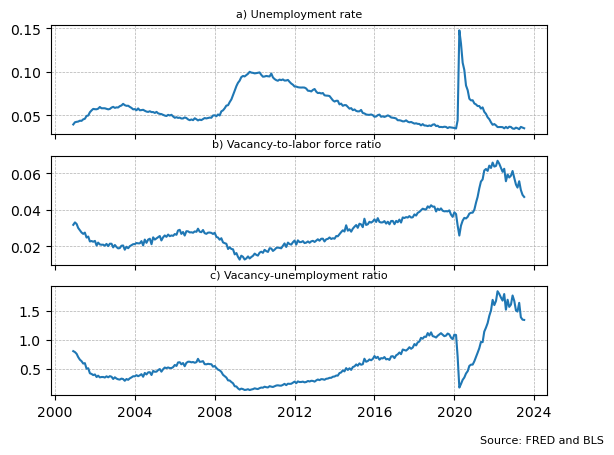

In [11]:
# plot series
fig, axs = plt.subplots(3, sharex=True)

print(type(fig))
print(type(axs))

axs[0].plot(df['urate'])
axs[0].set_title('a) Unemployment rate', fontsize=8)
axs[0].grid(linestyle='--', linewidth=0.5)

axs[1].plot(df['vrate'])
axs[1].set_title('b) Vacancy-to-labor force ratio ', fontsize=8)
axs[1].grid(linestyle='--', linewidth=0.5)

axs[2].plot(df['theta'])
axs[2].set_title('c) Vacancy-unemployment ratio', fontsize=8)
axs[2].grid(linestyle='--', linewidth=0.5)

# source
fig.text(0.99, 0.01, 'Source: FRED and BLS', fontsize=8, horizontalalignment='right')

Online data importation from FRED

In [12]:
# method 2: import from FRED using the fredapi package
# this requires an API key from FRED (https://fred.stlouisfed.org/docs/api/api_key.html)

# install fredapi package
# %pip install fredapi  

# import fredapi package
from fredapi import Fred

# set API key
fred = Fred(api_key='7280215dd864ebdfa031e0e8ac17be1b')

# Job Openings: Total Private (FRED from BLS series number JTS1000JOL; units: thousands)
vac = fred.get_series('JTS1000JOL')

# Unemployed Population: Aged 15 and over: All Persons for United States (FRED from BLS series number LFUNTTTTUSM647S; units: persons)
unem = fred.get_series('LFUNTTTTUSM647S')

# labor force: Aged 15 and over: All Persons for United States (FRED from BLS series number CLF16OV; units: throusands)
lf = fred.get_series('CLF16OV')


Exercise 1: solve for vacancy costing post $c>0$ consistent with the average value of theta in U.S. data (2000-2023), using the basic DMP job creation condition. Plot the implied average costs of filling a vacancy.

0.6100813364356024
Vacancy posting cost, c = 
0.7941655243107583


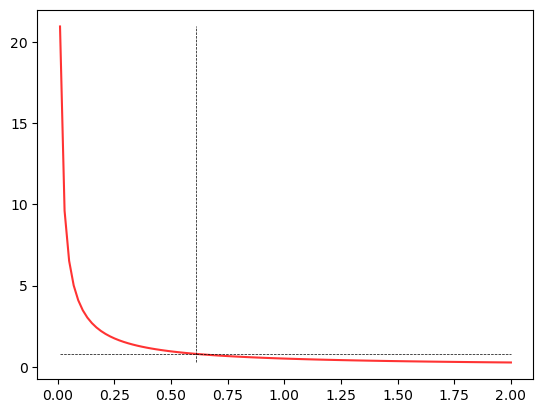

In [13]:
# @title
# Exercise 1: solve for vacancy posting cost consistent with the average value of theta in the data
# and compute/plot the cost of filling a vacancy over time
theta_avg = df['theta'].mean()
print(theta_avg)

# define a function for job posting cost given tightness
def f(theta):
    return q(theta)/(r + delta + gamma*p(theta)) * (1-gamma) * (z - b)

# plot the function f(theta)
theta = np.linspace(0.01, 2, 100)
plt.plot(theta, f(theta), color='#FF3333')
plt.vlines(theta_avg, f(theta).min(), f(theta).max(), color='black', linestyle='--', linewidth=0.5, label='Average value of $\\theta$')
plt.hlines(c, theta[0], theta[-1], color='black', linestyle='--', linewidth=0.5, label='Zero line')

# compute cost consistent with average theta
c = f(theta_avg)

# print result
print('Vacancy posting cost, c = ')
print(c)


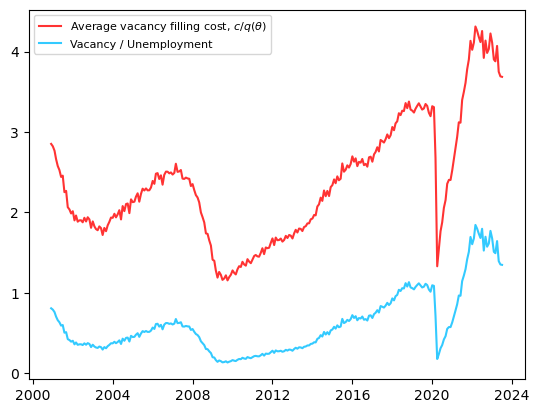

In [14]:
# @title
# plot the average vacancy filling cost
plt.clf()
vfc = c / q(df['theta'])
plt.plot(vfc, label='Average vacancy filling cost, $c/q(\\theta)$', color='#FF3333')
plt.plot(df['theta'], label='Vacancy / Unemployment', color='#33CAFF')
plt.legend(fontsize=8, loc='upper left')


Exercise 2: Plot the Empirical Beveridge Curve for (i) the full sample and (ii) the pre-COVID and post-COVID subsamples by defining a function that takes a dataframe as input and plots the Beveridge curve. Hint: use the 'plt.scatter' function.

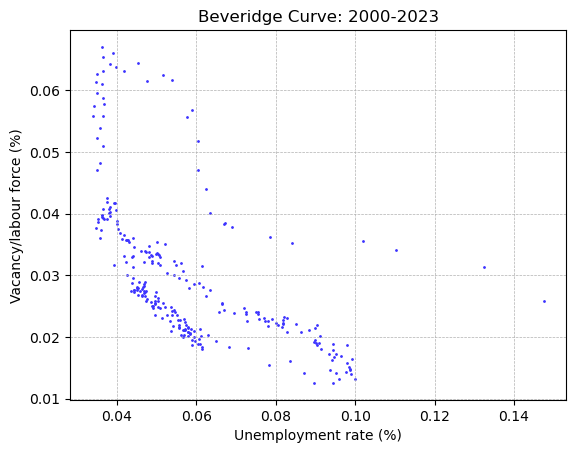

In [15]:
# @title
# Exercise 2: Plot the Empirical Beveridge Curve for (i) the full sample and (ii) the pre-COVID and post-COVID subsamples
# by defining a function that takes a dataframe as input and plots the Beveridge curve

# define a function for drawing the Beveridge curve given the sample
def draw_beveridge_curve(df, title):
    plt.scatter(df['urate'], df['vrate'], s=1, color = '#3C33FF' )
    plt.title(title, fontsize=12)
    plt.ylabel('Vacancy/labour force (%)', fontsize=10)
    plt.xlabel('Unemployment rate (%)', fontsize=10)
    plt.grid(linestyle='--', linewidth=0.5)
    plt.show()

# full sample
draw_beveridge_curve(df, 'Beveridge Curve: 2000-2023')


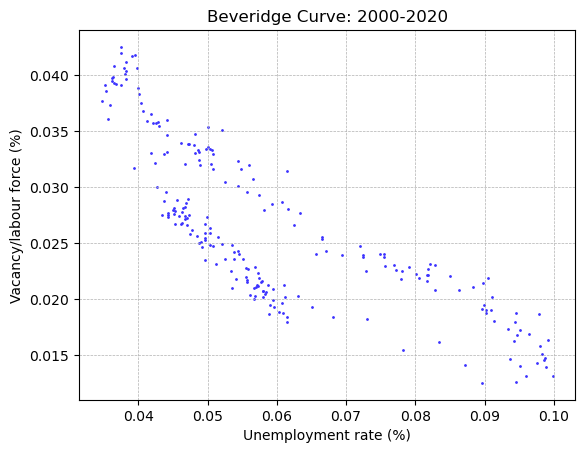

In [16]:
# @title
# pre-pandemic
df2 = df.loc['2000-01-01':'2020-02-01']
draw_beveridge_curve(df2, 'Beveridge Curve: 2000-2020')

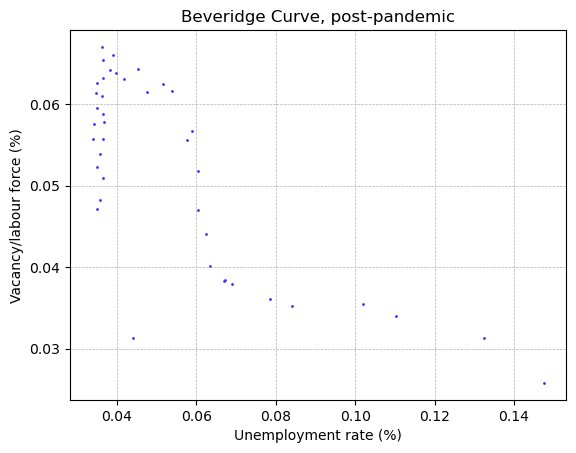

In [17]:
# @title
# post-pandemic
df3 = df.loc['2020-03-01':]
draw_beveridge_curve(df3, 'Beveridge Curve, post-pandemic')

Exercise 3: solve for the quarterly log productivity $z_t$ consistent with the quarterly averaged theta in U.S. data, as per the basic DMP job creation condition. Plot the implied log quarterly productivity along with the labour-market tightness.

In [18]:
# @title
# Exercise 3: solve for log productivity consistent quarterly averaged theta in the data

# compute quarterly averages of data
dfq = df.resample('Q').mean()

# detrend theta with hp filter
# %pip install statsmodels
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter

tmp = hpfilter(dfq['theta'], lamb=1600)
dfq['theta_trend'] = tmp[1]
dfq['theta_cycle'] = tmp[0]


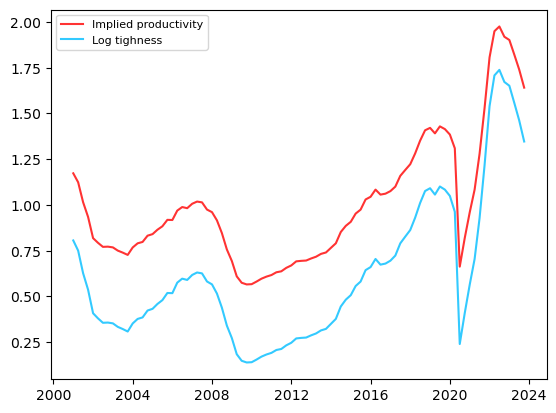

In [19]:
# @title
# define a function for productivity given theta
def f(theta):
    return (r + delta + gamma*p(theta))/((1-gamma)*q(theta))*c + b

# Compute implied productivity using function
dfq['implied_prod'] = f(dfq['theta'])

# plot
plt.plot(dfq['implied_prod'], label='Implied productivity', color='#FF3333')
plt.plot(dfq['theta'], label='Log tighness', color='#33CAFF')
plt.legend(fontsize=8, loc='upper left')


Exercise 4: plot the theoretical Beveridge curve given the parameters and given theta in U.S. data.

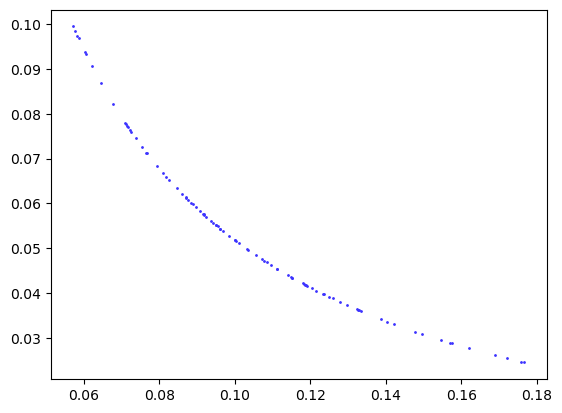

In [20]:
# @title
# Exercise 4: Plot the Theoretical Beveridge Curve given the parameters and given theta in the data.

dfq['urate_implied'] = delta / (delta + p(dfq['theta'])) # implied unemployment rate
dfq['vrate_implied'] = dfq['theta']*dfq['urate_implied'] # implied vacancy rate

# plot the implied Beveridge curve
plt.scatter(dfq['urate_implied'], dfq['vrate_implied'], s=1, color = '#3C33FF' )


In [22]:
# loop
for t in dfq.index :
        print(t)



2000-12-31 00:00:00
2001-03-31 00:00:00
2001-06-30 00:00:00
2001-09-30 00:00:00
2001-12-31 00:00:00
2002-03-31 00:00:00
2002-06-30 00:00:00
2002-09-30 00:00:00
2002-12-31 00:00:00
2003-03-31 00:00:00
2003-06-30 00:00:00
2003-09-30 00:00:00
2003-12-31 00:00:00
2004-03-31 00:00:00
2004-06-30 00:00:00
2004-09-30 00:00:00
2004-12-31 00:00:00
2005-03-31 00:00:00
2005-06-30 00:00:00
2005-09-30 00:00:00
2005-12-31 00:00:00
2006-03-31 00:00:00
2006-06-30 00:00:00
2006-09-30 00:00:00
2006-12-31 00:00:00
2007-03-31 00:00:00
2007-06-30 00:00:00
2007-09-30 00:00:00
2007-12-31 00:00:00
2008-03-31 00:00:00
2008-06-30 00:00:00
2008-09-30 00:00:00
2008-12-31 00:00:00
2009-03-31 00:00:00
2009-06-30 00:00:00
2009-09-30 00:00:00
2009-12-31 00:00:00
2010-03-31 00:00:00
2010-06-30 00:00:00
2010-09-30 00:00:00
2010-12-31 00:00:00
2011-03-31 00:00:00
2011-06-30 00:00:00
2011-09-30 00:00:00
2011-12-31 00:00:00
2012-03-31 00:00:00
2012-06-30 00:00:00
2012-09-30 00:00:00
2012-12-31 00:00:00
2013-03-31 00:00:00
